# Cryptocurrencies, stock markets and COVID-19

The discussion about up to what level do investors look into the real economy to make decisions is a much debated one. The positive and behavioral approaches -along with all their intersections- are research rabbit holes that seek to shed some light on the logic behind investment allocation decisions. However, no matter how far into one side or another one was standing, Covid-19 paralyzed the world. Therefore, it was discounted that the largest economic shock of our generation would be reflected in the forever record breaking stock market. But what about the crypto market? After the Bitcoin halving that took place in May 2020, a bull market was expected to begin in the crypto universe. If history serves as a predictor of the future -another controversial debate-, 2021 was expected to be a reprise of the 2013 and 2017 bullish trends. 

With more than 18 months into the pandemic, we know that the stock market took a hit, followed by a fast recovery that led to new all time highs. 


In [1]:
#%%capture
# Install some necessary packages
#!pip install functools
#!pip install --upgrade covid
#!pip install fastquant
#!pip install yfinance

In [2]:
# Import the required libraries and set some parameters
import numpy as np
import pandas as pd
import fastquant as fq
from datetime import datetime as dt
import yfinance as yf
from functools import reduce
import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (20, 8)
%config InlineBackend.figure_format='retina'

In [3]:
# Import COVID data from Our World in Data
Covid_data = pd.read_csv('https://covid.ourworldindata.org/data/owid-covid-data.csv')

In [4]:
# Check the dataset
Covid_data.head()

,iso_code,continent,location,date,total_cases,new_cases,new_cases_smoothed,total_deaths,new_deaths,new_deaths_smoothed,...,female_smokers,male_smokers,handwashing_facilities,hospital_beds_per_thousand,life_expectancy,human_development_index,excess_mortality_cumulative_absolute,excess_mortality_cumulative,excess_mortality,excess_mortality_cumulative_per_million
0,AFG,Asia,Afghanistan,2020-02-24,5.0,5.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
1,AFG,Asia,Afghanistan,2020-02-25,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
2,AFG,Asia,Afghanistan,2020-02-26,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
3,AFG,Asia,Afghanistan,2020-02-27,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN
4,AFG,Asia,Afghanistan,2020-02-28,5.0,0.0,NaN,NaN,NaN,NaN,...,NaN,NaN,37.746,0.5,64.83,0.511,NaN,NaN,NaN,NaN


In [5]:
# Keep cuntry ID, date, daily number of cases and daily number of deaths
Covid_data = Covid_data[['iso_code','date','new_cases','new_deaths']]

In [6]:
# Check the new dataset
Covid_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 125759 entries, 0 to 125758
Data columns (total 4 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   iso_code    125759 non-null  object 
 1   date        125759 non-null  object 
 2   new_cases   118948 non-null  float64
 3   new_deaths  108176 non-null  float64
dtypes: float64(2), object(2)
memory usage: 3.8+ MB


In [7]:
# See the list of countries
Covid_data.iso_code.unique()

array(['AFG', 'OWID_AFR', 'ALB', 'DZA', 'AND', 'AGO', 'AIA', 'ATG', 'ARG',
       'ARM', 'ABW', 'OWID_ASI', 'AUS', 'AUT', 'AZE', 'BHS', 'BHR', 'BGD',
       'BRB', 'BLR', 'BEL', 'BLZ', 'BEN', 'BMU', 'BTN', 'BOL', 'BES',
       'BIH', 'BWA', 'BRA', 'VGB', 'BRN', 'BGR', 'BFA', 'BDI', 'KHM',
       'CMR', 'CAN', 'CPV', 'CYM', 'CAF', 'TCD', 'CHL', 'CHN', 'COL',
       'COM', 'COG', 'COK', 'CRI', 'CIV', 'HRV', 'CUB', 'CUW', 'CYP',
       'CZE', 'COD', 'DNK', 'DJI', 'DMA', 'DOM', 'ECU', 'EGY', 'SLV',
       'GNQ', 'ERI', 'EST', 'SWZ', 'ETH', 'OWID_EUR', 'OWID_EUN', 'FRO',
       'FLK', 'FJI', 'FIN', 'FRA', 'PYF', 'GAB', 'GMB', 'GEO', 'DEU',
       'GHA', 'GIB', 'GRC', 'GRL', 'GRD', 'GTM', 'GGY', 'GIN', 'GNB',
       'GUY', 'HTI', 'HND', 'HKG', 'HUN', 'ISL', 'IND', 'IDN', 'OWID_INT',
       'IRN', 'IRQ', 'IRL', 'IMN', 'ISR', 'ITA', 'JAM', 'JPN', 'JEY',
       'JOR', 'KAZ', 'KEN', 'KIR', 'OWID_KOS', 'KWT', 'KGZ', 'LAO', 'LVA',
       'LBN', 'LSO', 'LBR', 'LBY', 'LIE', 'LTU', 'LUX', 'MAC', 'MDG

In [8]:
# Generate a list with the 38 OECD countries
OECD_list = ['AUS','AUT','BEL','CAN','CHL','COL','CRI','CZE','DNK','ESP','EST','FIN','FRA','GBR','DEU','GRC','HUN','IRL','ISL',
            'ISR', 'ITA','JPN','KOR','LVA','LTU','LUX','MEX','NLD','NOR', 'POL', 'NZL','PRT','SVK','SVN','SWE','CHE','TUR','USA']

In [9]:
# Make a mask to keep only OECD countries
mask_OECD = Covid_data['iso_code'].apply(lambda x: any(country in x for country in OECD_list))

In [10]:
# Apply the mask and check that we have only kept the desired countries
Covid_OECD = Covid_data[mask_OECD]
Covid_OECD['iso_code'].unique()

array(['AUS', 'AUT', 'BEL', 'CAN', 'CHL', 'COL', 'CRI', 'CZE', 'DNK',
       'EST', 'FIN', 'FRA', 'DEU', 'GRC', 'HUN', 'ISL', 'IRL', 'ISR',
       'ITA', 'JPN', 'LVA', 'LTU', 'LUX', 'MEX', 'NLD', 'NZL', 'NOR',
       'POL', 'PRT', 'SVK', 'SVN', 'KOR', 'ESP', 'SWE', 'CHE', 'TUR',
       'GBR', 'USA'], dtype=object)

In [11]:
# Generate the OECD sum of cases
Covid_OECD_final = Covid_OECD.groupby('date').agg({'new_cases':'sum', 'new_deaths': 'sum'}).reset_index()
Covid_OECD_final.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 662 entries, 0 to 661
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   date        662 non-null    object 
 1   new_cases   662 non-null    float64
 2   new_deaths  662 non-null    float64
dtypes: float64(2), object(1)
memory usage: 15.6+ KB


In [12]:
# Check descriptive statistics
Covid_OECD_final.describe()

,new_cases,new_deaths
count,662.000000,662.000000
mean,174678.312689,3296.116314
std,140885.697116,2648.065293
min,0.000000,-463.000000
25%,61605.250000,1490.500000
50%,128694.500000,2475.500000
75%,274979.000000,4592.000000
max,636776.000000,13012.000000


In [13]:
# Found a negative value that doesn't make sense. I check which date it corresponds to. 
Covid_OECD_final[Covid_OECD_final.new_deaths<0]

,date,new_cases,new_deaths
145,2020-05-25,32510.0,-463.0


The negative death count corresponds to May 25th 2020. I will look for further information on the OECD dataset.

In [14]:
Covid_OECD[Covid_OECD.new_deaths<0]

,iso_code,date,new_cases,new_deaths
6709,AUS,2020-06-01,19.0,-1.0
7130,AUS,2021-07-27,207.0,-1.0
7141,AUS,2021-08-07,277.0,-1.0
7366,AUT,2020-07-21,84.0,-1.0
7448,AUT,2020-10-11,896.0,-1.0
...,...,...,...,...
109831,CHE,2021-09-11,0.0,-1.0
109857,CHE,2021-10-07,1125.0,-7.0
109866,CHE,2021-10-16,0.0,-1.0
109867,CHE,2021-10-17,0.0,-1.0


In [15]:
print(f"start date: {Covid_OECD_final['date'].min()} ")
print(f"end date: {Covid_OECD_final['date'].max()}")

start date: 2020-01-01 
end date: 2021-10-23


In [16]:
# Create two new columns with moving averages
Covid_OECD_final['cases_rolling'] = Covid_OECD_final['new_cases'].rolling(window=7).mean()
Covid_OECD_final['deaths_rolling'] = Covid_OECD_final['new_deaths'].rolling(window=7).mean()
Covid_OECD_final.head(n=10)

,date,new_cases,new_deaths,cases_rolling,deaths_rolling
0,2020-01-01,0.0,0.0,NaN,NaN
1,2020-01-02,0.0,0.0,NaN,NaN
2,2020-01-03,0.0,0.0,NaN,NaN
3,2020-01-04,0.0,0.0,NaN,NaN
4,2020-01-05,0.0,0.0,NaN,NaN
5,2020-01-06,0.0,0.0,NaN,NaN
6,2020-01-07,0.0,0.0,0.0,0.0
7,2020-01-08,0.0,0.0,0.0,0.0
8,2020-01-09,0.0,0.0,0.0,0.0
9,2020-01-10,0.0,0.0,0.0,0.0


In [17]:
Covid_OECD_final['date'] = pd.to_datetime(Covid_OECD_final['date']) #, format='%Y %M %D')
Covid_OECD_final.set_index('date', inplace=True)
Covid_OECD_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 662 entries, 2020-01-01 to 2021-10-23
Data columns (total 4 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   new_cases       662 non-null    float64
 1   new_deaths      662 non-null    float64
 2   cases_rolling   656 non-null    float64
 3   deaths_rolling  656 non-null    float64
dtypes: float64(4)
memory usage: 25.9 KB


## Stock data

In [18]:
tickers = ["TSLA", "MSFT", "NFLX", "BKNG", "AAL"]
from_date = "2020-01-01"
to_date = dt.today()
stocks_data = yf.download(" ".join(tickers), start=from_date, end=to_date)
stocks_data.head()

[*********************100%***********************]  5 of 5 completed


Adj Close                                                  \
                  AAL         BKNG        MSFT        NFLX       TSLA   
Date                                                                    
2020-01-02  28.982893  2074.580078  157.903458  329.809998  86.052002   
2020-01-03  27.548195  2065.479980  155.937302  325.899994  88.601997   
2020-01-06  27.219410  2047.400024  156.340363  335.829987  90.307999   
2020-01-07  27.119778  2068.050049  154.914886  330.750000  93.811996   
2020-01-08  27.737495  2062.899902  157.382416  339.260010  98.428001   

                Close                                                  ...  \
                  AAL         BKNG        MSFT        NFLX       TSLA  ...   
Date                                                                   ...   
2020-01-02  29.090000  2074.580078  160.619995  329.809998  86.052002  ...   
2020-01-03  27.650000  2065.479980  158.619995  325.899994  88.601997  ...   
2020-01-06  27.320000  2047.400024  159.029999  335.829987  90.307999  ...   
2020-01-07  27.219999  2068.050049  157.580002  330.750000  93.811996  ...   
2020-01-08  27.840000  2062.899902  160.089996  339.260010  98.428001  ...   

                 Open                                                  \
                  AAL         BKNG        MSFT        NFLX       TSLA   
Date                                                                    
2020-01-02  28.980000  2068.399902  158.779999  326.100006  84.900002   
2020-01-03  28.270000  2042.469971  158.320007  326.779999  88.099998   
2020-01-06  27.190001  2050.000000  157.080002  323.119995  88.094002   
2020-01-07  27.559999  2047.390015  159.320007  336.470001  92.279999   
2020-01-08  27.100000  2066.840088  158.929993  331.489990  94.739998   

              Volume                                        
                 AAL    BKNG      MSFT     NFLX       TSLA  
Date                                                        
2020-01-02   6451100  329000  22622100  4485800   47660500  
2020-01-03  14008900  294000  21116200  3806900   88892500  
2020-01-06   6105800  384000  20813700  5663100   50665000  
2020-01-07   6105900  345300  21634100  4703200   89410500  
2020-01-08  10496800  325800  27746500  7104500  155721500  

[5 rows x 30 columns]

In [19]:
stocks_data = stocks_data['Adj Close']
for tick in tickers:
    stocks_data[tick + '_rolling'] = stocks_data[tick].rolling(window=7).mean()
stocks_data.head(n=10)

,AAL,BKNG,MSFT,NFLX,TSLA,TSLA_rolling,MSFT_rolling,NFLX_rolling,BKNG_rolling,AAL_rolling
Date,,,,,,,,,,
2020-01-02,28.982893,2074.580078,157.903458,329.809998,86.052002,NaN,NaN,NaN,NaN,NaN
2020-01-03,27.548195,2065.479980,155.937302,325.899994,88.601997,NaN,NaN,NaN,NaN,NaN
2020-01-06,27.219410,2047.400024,156.340363,335.829987,90.307999,NaN,NaN,NaN,NaN,NaN
2020-01-07,27.119778,2068.050049,154.914886,330.750000,93.811996,NaN,NaN,NaN,NaN,NaN
2020-01-08,27.737495,2062.899902,157.382416,339.260010,98.428001,NaN,NaN,NaN,NaN,NaN
2020-01-09,27.847092,2084.290039,159.348572,335.660004,96.267998,NaN,NaN,NaN,NaN,NaN
2020-01-10,27.219410,2086.899902,158.611313,329.049988,95.629997,92.728570,157.205473,332.322854,2069.942854,27.667753
2020-01-13,27.289152,2080.500000,160.518494,338.920013,104.972000,95.431427,157.579049,333.624285,2070.788557,27.425790
2020-01-14,27.428638,2071.479980,159.387924,338.690002,107.584000,98.143142,158.071995,335.451429,2071.645700,27.408711


## Crypto data

In [26]:
#set tomeframe
from_date = "2019-12-31"
to_date = dt.today().strftime('%Y-%m-%d')

In [27]:
#pull the data
BTC = fq.get_crypto_data("BTC/USDT", from_date, str(to_date))
print('1/5 done')
ETH = fq.get_crypto_data("ETH/USDT", from_date, str(to_date)) 
print('2/5 done')
BNB = fq.get_crypto_data("BNB/USDT", from_date, str(to_date)) 
print('3/5 done')
ADA = fq.get_crypto_data("ADA/USDT", from_date, str(to_date)) 
print('4/5 done')
XRP = fq.get_crypto_data("XRP/USDT", from_date, str(to_date)) 
print('DONE')

1/5 done
2/5 done
3/5 done
4/5 done
DONE


In [28]:
# Keep close price and set time as index
BTC = BTC[['close']].rename(columns={"close": "BTC_close"})
BTC.index.names = ['Date']
ETH = ETH[['close']].rename(columns={"close": "ETH_close"})
ETH.index.names = ['Date']
BNB = BNB[['close']].rename(columns={"close": "BNB_close"})
BNB.index.names = ['Date']
ADA = ADA[['close']].rename(columns={"close": "ADA_close"})
ADA.index.names = ['Date']
XRP = XRP[['close']].rename(columns={"close": "XRP_close"})
XRP.index.names = ['Date']

In [29]:
BTC.head()

,BTC_close
Date,
2020-01-01,7200.85
2020-01-02,6965.71
2020-01-03,7344.96
2020-01-04,7354.11
2020-01-05,7358.75


In [30]:
# Merge all datasets
Coins = [BTC,ETH,BNB,ADA,XRP]
Cryptos = reduce(lambda left,right: pd.merge(left,right,left_index=True, right_index=True,
                                            how='outer'), Coins)
Cryptos.head()

,BTC_close,ETH_close,BNB_close,ADA_close,XRP_close
Date,,,,,
2020-01-01,7200.85,130.77,13.7184,0.03348,0.19305
2020-01-02,6965.71,127.19,13.0105,0.03269,0.18750
2020-01-03,7344.96,134.35,13.6474,0.03417,0.19338
2020-01-04,7354.11,134.20,13.8092,0.03434,0.19305
2020-01-05,7358.75,135.37,14.0532,0.03460,0.19453


In [31]:
# Check from and to dates
print(f"start date: {Cryptos.index.min()} ")
print(f"end date: {Cryptos.index.max()}")

start date: 2020-01-01 00:00:00 
end date: 2021-10-24 00:00:00


In [32]:
# Check that the merge was correct
Cryptos.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 663 entries, 2020-01-01 to 2021-10-24
Data columns (total 5 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   BTC_close  663 non-null    float64
 1   ETH_close  663 non-null    float64
 2   BNB_close  663 non-null    float64
 3   ADA_close  663 non-null    float64
 4   XRP_close  663 non-null    float64
dtypes: float64(5)
memory usage: 51.1 KB


In [33]:
# Create 7 days MA for each coin
coins = ['BTC_close','ETH_close','BNB_close','ADA_close','XRP_close']
for coin in coins:
    Cryptos[coin + '_rolling'] = Cryptos[coin].rolling(window=7).mean()
Cryptos.head(n=10)

,BTC_close,ETH_close,BNB_close,ADA_close,XRP_close,BTC_close_rolling,ETH_close_rolling,BNB_close_rolling,ADA_close_rolling,XRP_close_rolling
Date,,,,,,,,,,
2020-01-01,7200.85,130.77,13.7184,0.03348,0.19305,NaN,NaN,NaN,NaN,NaN
2020-01-02,6965.71,127.19,13.0105,0.03269,0.18750,NaN,NaN,NaN,NaN,NaN
2020-01-03,7344.96,134.35,13.6474,0.03417,0.19338,NaN,NaN,NaN,NaN,NaN
2020-01-04,7354.11,134.20,13.8092,0.03434,0.19305,NaN,NaN,NaN,NaN,NaN
2020-01-05,7358.75,135.37,14.0532,0.03460,0.19453,NaN,NaN,NaN,NaN,NaN
2020-01-06,7758.00,144.15,14.9471,0.03732,0.22310,NaN,NaN,NaN,NaN,NaN
2020-01-07,8145.28,142.80,15.0226,0.03700,0.21335,7446.808571,135.547143,14.029771,0.034800,0.199709
2020-01-08,8055.98,140.72,14.5334,0.03631,0.20750,7568.970000,136.968571,14.146200,0.035204,0.201773
2020-01-09,7817.76,137.74,14.3978,0.03616,0.20373,7690.691429,138.475714,14.344386,0.035700,0.204091


## Comparing the crypto and COVID evolution

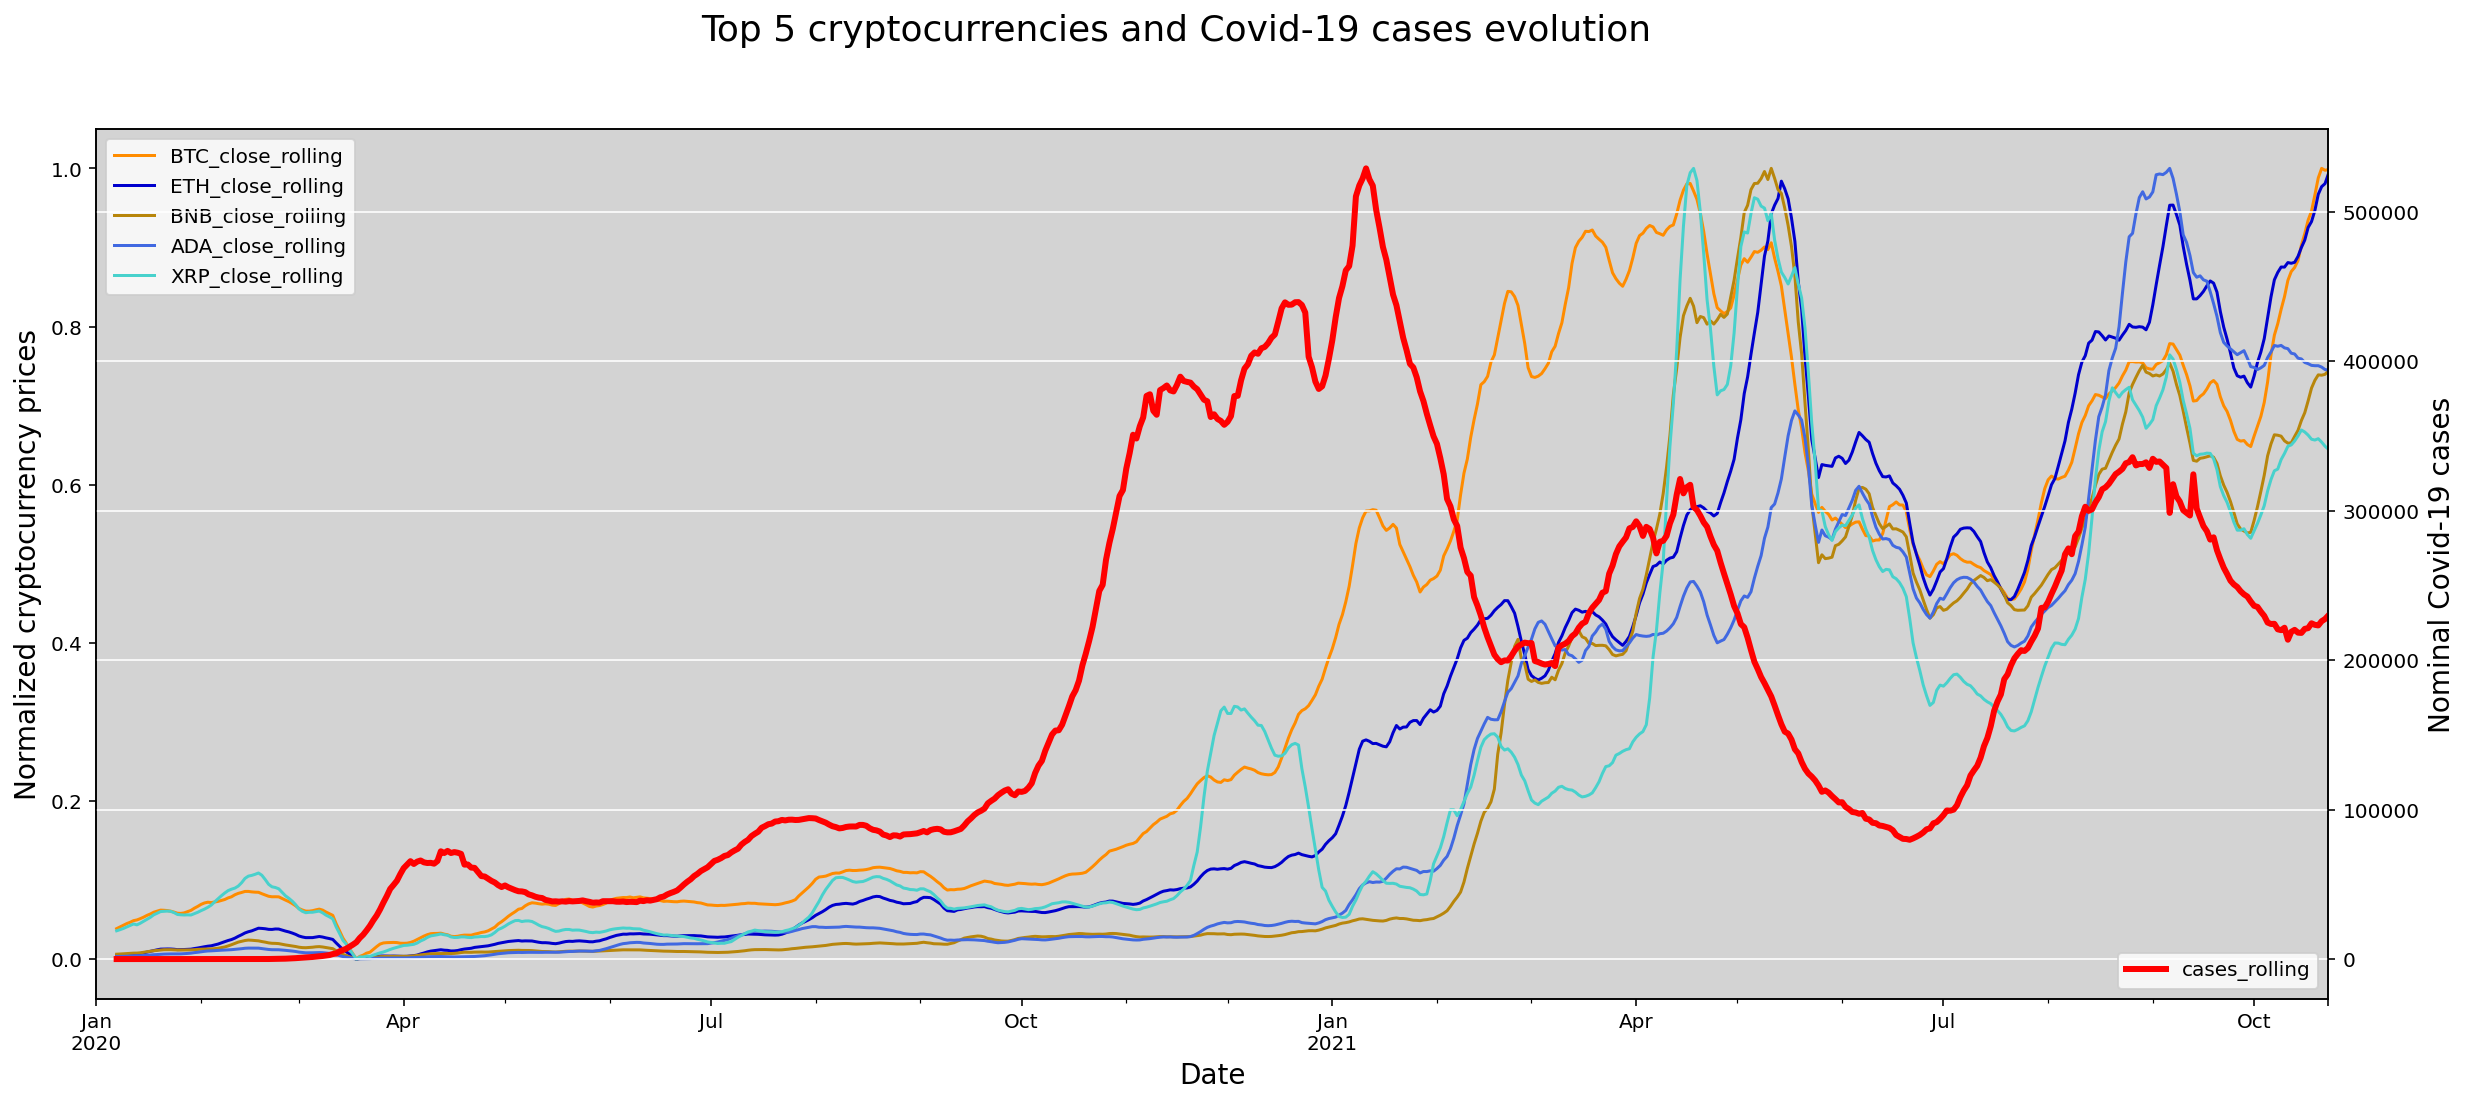

In [35]:

Coins = ['BTC_close_rolling','ETH_close_rolling','BNB_close_rolling','ADA_close_rolling','XRP_close_rolling']
colors = ['darkorange','mediumblue','darkgoldenrod','royalblue','mediumturquoise']
ncolor = 0
#plt.rcParams["figure.facecolor"] = "w"
for coin in Coins:
    # Normalize values
    Cryptos[coin] = (Cryptos[coin] - Cryptos[coin].min()) / (Cryptos[coin].max() - Cryptos[coin].min())
    ax = Cryptos[coin].plot(color=colors[ncolor])
    ax.legend()
    ncolor+=1
ax.set(facecolor = "lightgrey")
ax1 = ax.twinx()
Covid_OECD_final['cases_rolling'].plot(c = 'red', ax = ax1, linewidth=3)
ax1.legend(loc='lower right')

plt.suptitle('Top 5 cryptocurrencies and Covid-19 cases evolution', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Normalized cryptocurrency prices', fontsize=14)
ax1.set_ylabel('Nominal Covid-19 cases', fontsize=14)
plt.grid(c='w')
plt.show()

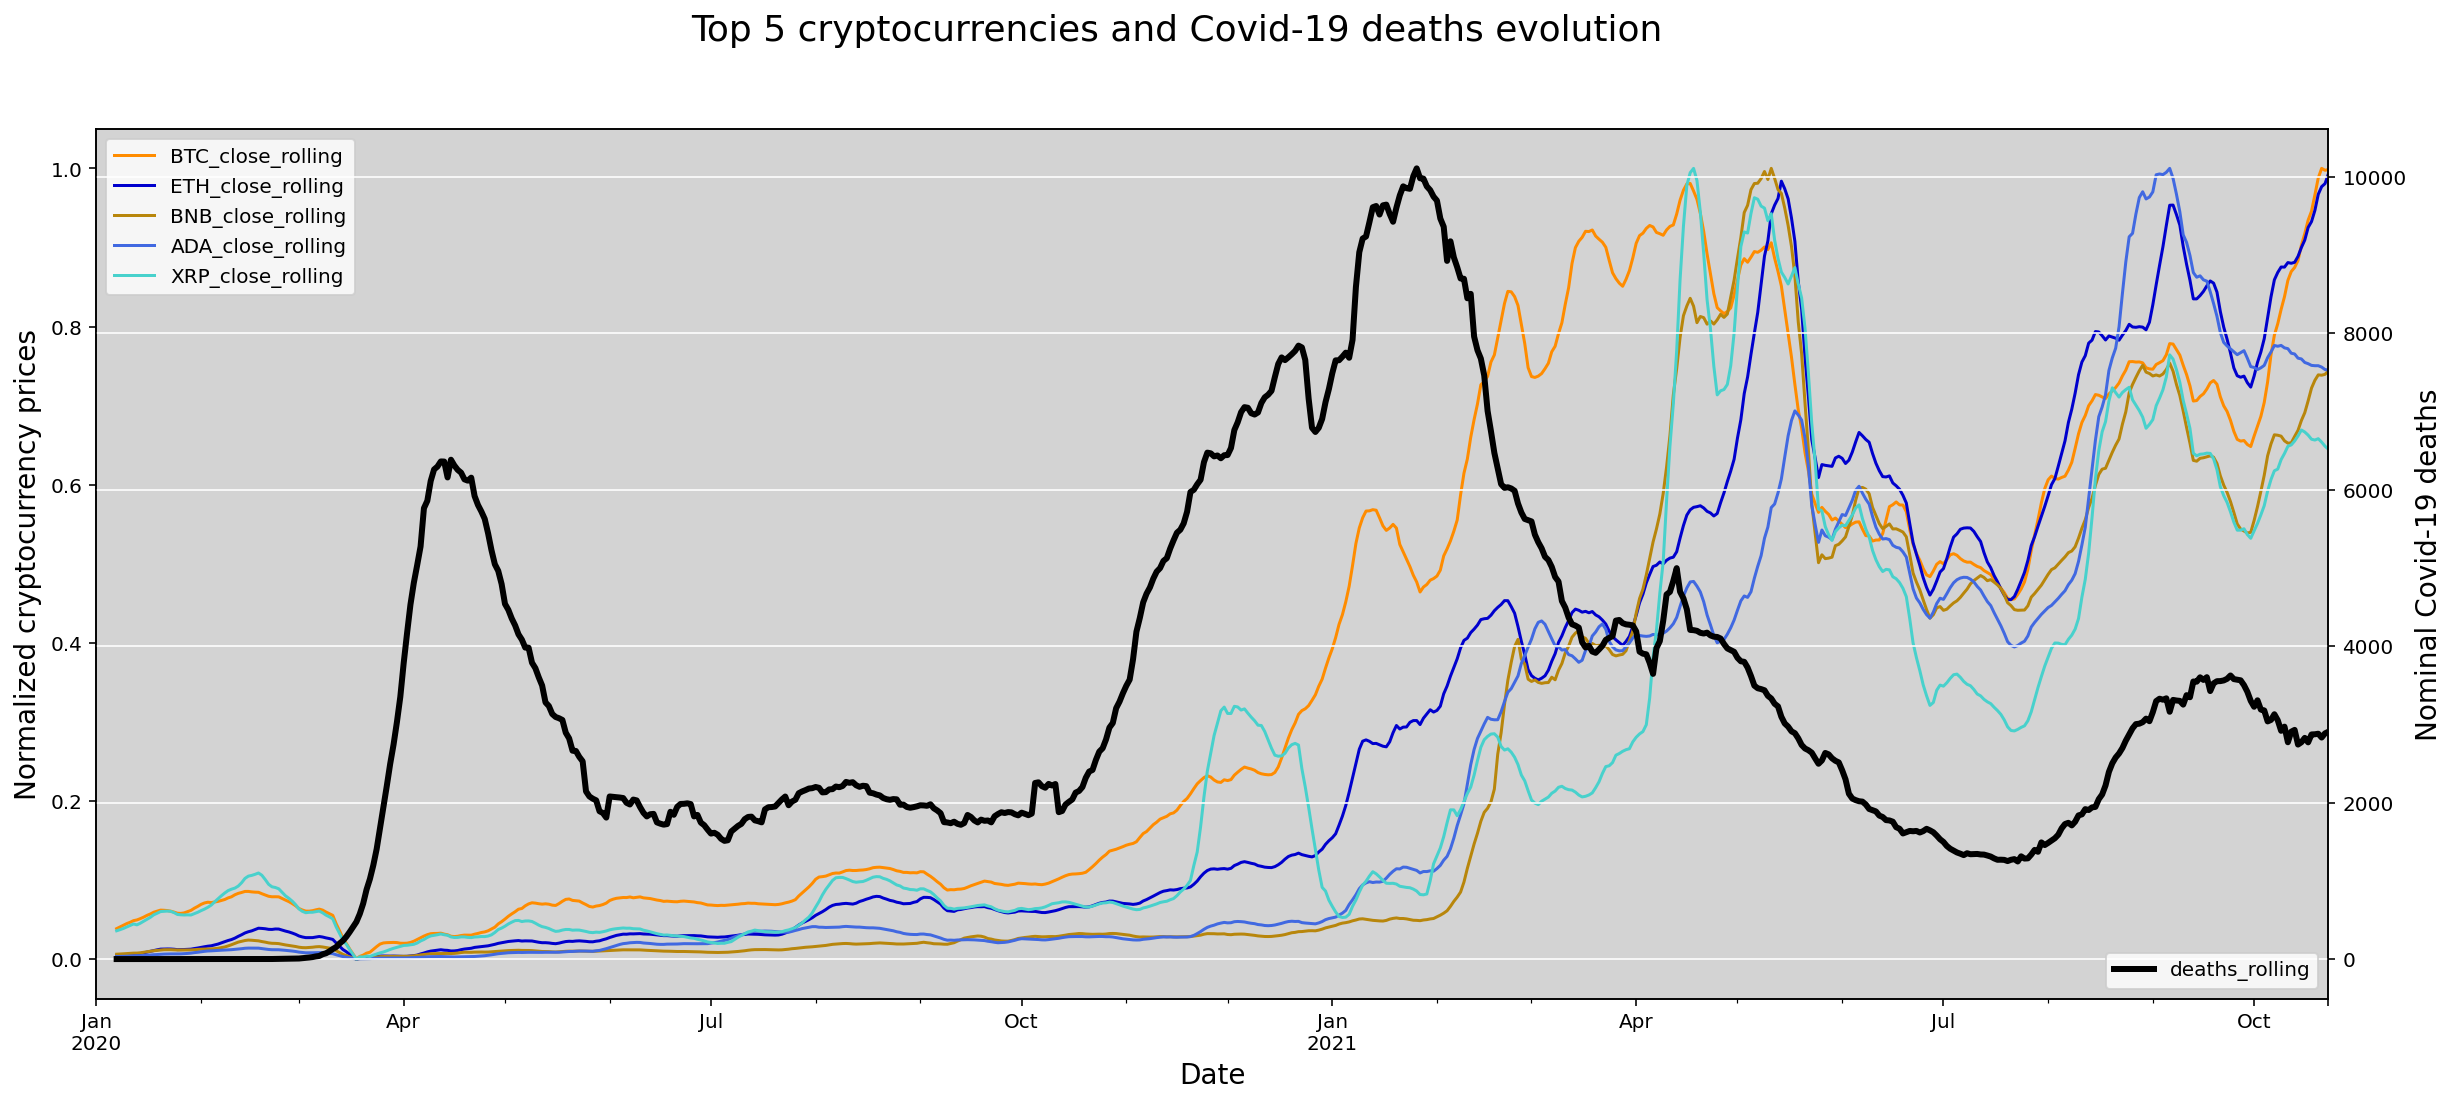

In [37]:
ncolor = 0
for coin in Coins:
    # Normalize values
    Cryptos[coin] = (Cryptos[coin] - Cryptos[coin].min()) / (Cryptos[coin].max() - Cryptos[coin].min())
    ax = Cryptos[coin].plot(color=colors[ncolor])
    ax.legend()
    ncolor+=1
ax1 = ax.twinx()
ax.set(facecolor = "lightgrey")
Covid_OECD_final['deaths_rolling'].plot(c = 'black', ax = ax1, linewidth=3)
ax1.legend(loc='lower right')
plt.suptitle('Top 5 cryptocurrencies and Covid-19 deaths evolution', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Normalized cryptocurrency prices', fontsize=14)
ax1.set_ylabel('Nominal Covid-19 deaths', fontsize=14)
plt.grid(c='w')
plt.show()

## Comparing the stocks and Covid evolution

In [ ]:
tickers = ["TSLA_rolling", "MSFT_rolling", "NFLX_rolling", "BKNG_rolling", "AAL_rolling"]
colors = ['green','tomato','mediumvioletred','cornflowerblue','dimgray']
ncolor = 0
#plt.rcParams["figure.facecolor"] = "w"
for tick in tickers:
    # Normalize values
    stocks_data[tick] = (stocks_data[tick] - stocks_data[tick].min()) / (stocks_data[tick].max() - stocks_data[tick].min())
    ax = stocks_data[tick].plot(color=colors[ncolor])
    ax.legend()
    ncolor+=1
ax.set(facecolor = "lightgrey")
ax1 = ax.twinx()
Covid_OECD_final['cases_rolling'].plot(c = 'red', ax = ax1, linewidth=3)
ax1.legend(loc='lower right')

plt.suptitle('5 representative S&P500 stocks and Covid-19 cases evolution', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Normalized stock prices', fontsize=14)
ax1.set_ylabel('Nominal Covid-19 cases', fontsize=14)
plt.grid(c='w')
plt.show()

In [ ]:
tickers = ["TSLA_rolling", "MSFT_rolling", "NFLX_rolling", "BKNG_rolling", "AAL_rolling"]
colors = ['green','tomato','mediumvioletred','cornflowerblue','dimgray']
ncolor = 0
#plt.rcParams["figure.facecolor"] = "w"
for tick in tickers:
    # Normalize values
    stocks_data[tick] = (stocks_data[tick] - stocks_data[tick].min()) / (stocks_data[tick].max() - stocks_data[tick].min())
    ax = stocks_data[tick].plot(color=colors[ncolor])
    ax.legend()
    ncolor+=1
ax.set(facecolor = "lightgrey")
ax1 = ax.twinx()
ax.set(facecolor = "lightgrey")
Covid_OECD_final['deaths_rolling'].plot(c = 'black', ax = ax1, linewidth=3)
ax1.legend(loc='lower right')
plt.suptitle('5 representative S&P500 stocks and Covid-19 deaths evolution', fontsize=18)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Normalized stock prices', fontsize=14)
ax1.set_ylabel('Nominal Covid-19 deaths', fontsize=14)
plt.grid(c='w')
plt.show()